In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs as mb
from sklearn.datasets import make_regression as mr
import numpy as np
import random

random.seed(1)

In [2]:
X, y, coef = mr(n_samples=100, n_features=2, n_informative=1, noise=5, coef=True, random_state=0)
X = np.insert(X,0,values=1,axis=1)

print(X, X.shape)
print(y, y.shape)
# print(coef)

[[ 1.          1.05445173 -1.07075262]
 [ 1.         -0.36274117 -0.63432209]
 [ 1.         -0.85409574  0.3130677 ]
 [ 1.          1.3263859   0.29823817]
 [ 1.         -0.4615846  -1.31590741]
 [ 1.          1.94362119 -1.17312341]
 [ 1.         -1.60205766  0.62523145]
 [ 1.         -0.40178094  0.17742614]
 [ 1.         -0.97727788  1.86755799]
 [ 1.          0.37816252  0.15494743]
 [ 1.         -0.30230275 -0.38732682]
 [ 1.         -0.74745481 -0.41361898]
 [ 1.         -0.18718385  0.04575852]
 [ 1.          0.31872765  0.92085882]
 [ 1.         -1.53624369  0.46566244]
 [ 1.          0.40015721  1.76405235]
 [ 1.         -0.82643854 -0.74475482]
 [ 1.         -0.74216502  0.8644362 ]
 [ 1.          0.70657317  0.3563664 ]
 [ 1.          0.90082649 -1.16514984]
 [ 1.         -0.57884966 -0.87079715]
 [ 1.         -0.20829876  0.57659082]
 [ 1.          0.68159452 -1.03424284]
 [ 1.          0.8024564  -0.26800337]
 [ 1.          0.77749036 -1.25279536]
 [ 1.         -1.5447711 

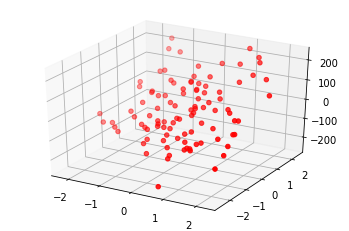

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,1], X[:,2], y, marker='o',color="red")

In [4]:
# Calculate the dependent variables Beta = (X'X)^-1 * X' * y
X_p = X.transpose().dot(X) #calculate (X'X)
det = np.linalg.det(X_p)
if det != 0:
    X_inv = np.linalg.inv(X_p)
    B_hat = X_inv.dot(X.transpose().dot(y))
    
print(B_hat)

[ 0.13679483 -0.99563187 95.99207854]


In [5]:
h_x = np.linspace(-10,20,2)
h_y = np.linspace(-10,20,2)
h_x,h_y = np.meshgrid(h_x,h_y)

z = B_hat[0] + B_hat[1]*h_x + B_hat[2]*h_y

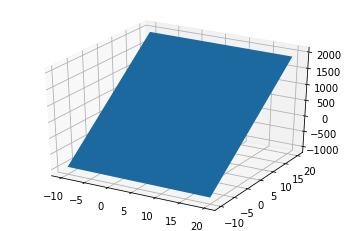

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X[:,1], X[:,2], y, marker='o',color="red")
ax.plot_surface(h_x,h_y,z)